# ASSIGNMENT-18.1-FORECASTING

## Forecast the airlines data set. 

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_excel('C:/Users/ad/Desktop/Ds Assign/Airlines+Data.xlsx')

In [4]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

<AxesSubplot:>

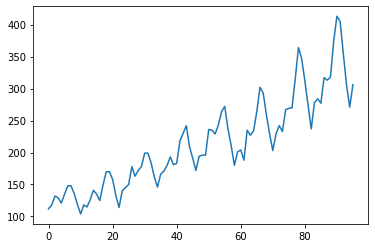

In [9]:
df.Passengers.plot()

In [10]:
df["Date"]=pd.to_datetime(df.Month,format="%b-%y")

df["Month_new"]=df.Date.dt.strftime("%b")            # month extraction
df["Year"]= df.Date.dt.strftime("%Y")                 # year extraction
df["Month_No"]=df.Date.dt.strftime("%b")             # month extraction

In [11]:
df.head()

,Month,Passengers,Date,Month_new,Year,Month_No
0,1995-01-01,112,1995-01-01,Jan,1995,Jan
1,1995-02-01,118,1995-02-01,Feb,1995,Feb
2,1995-03-01,132,1995-03-01,Mar,1995,Mar
3,1995-04-01,129,1995-04-01,Apr,1995,Apr
4,1995-05-01,121,1995-05-01,May,1995,May


In [12]:
df.tail()

,Month,Passengers,Date,Month_new,Year,Month_No
91,2002-08-01,405,2002-08-01,Aug,2002,Aug
92,2002-09-01,355,2002-09-01,Sep,2002,Sep
93,2002-10-01,306,2002-10-01,Oct,2002,Oct
94,2002-11-01,271,2002-11-01,Nov,2002,Nov
95,2002-12-01,306,2002-12-01,Dec,2002,Dec


<AxesSubplot:xlabel='Month_new', ylabel='Year'>

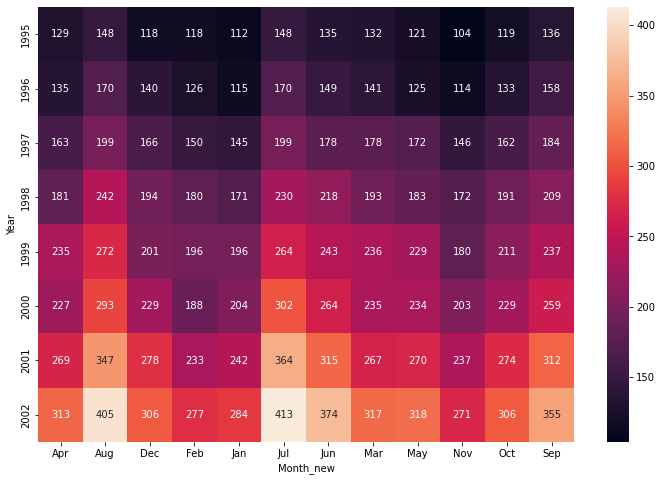

In [13]:
# heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="Year",columns="Month_new",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") # fmt is format of the grid values

From above it can observe that aug and july months have more passengers.

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

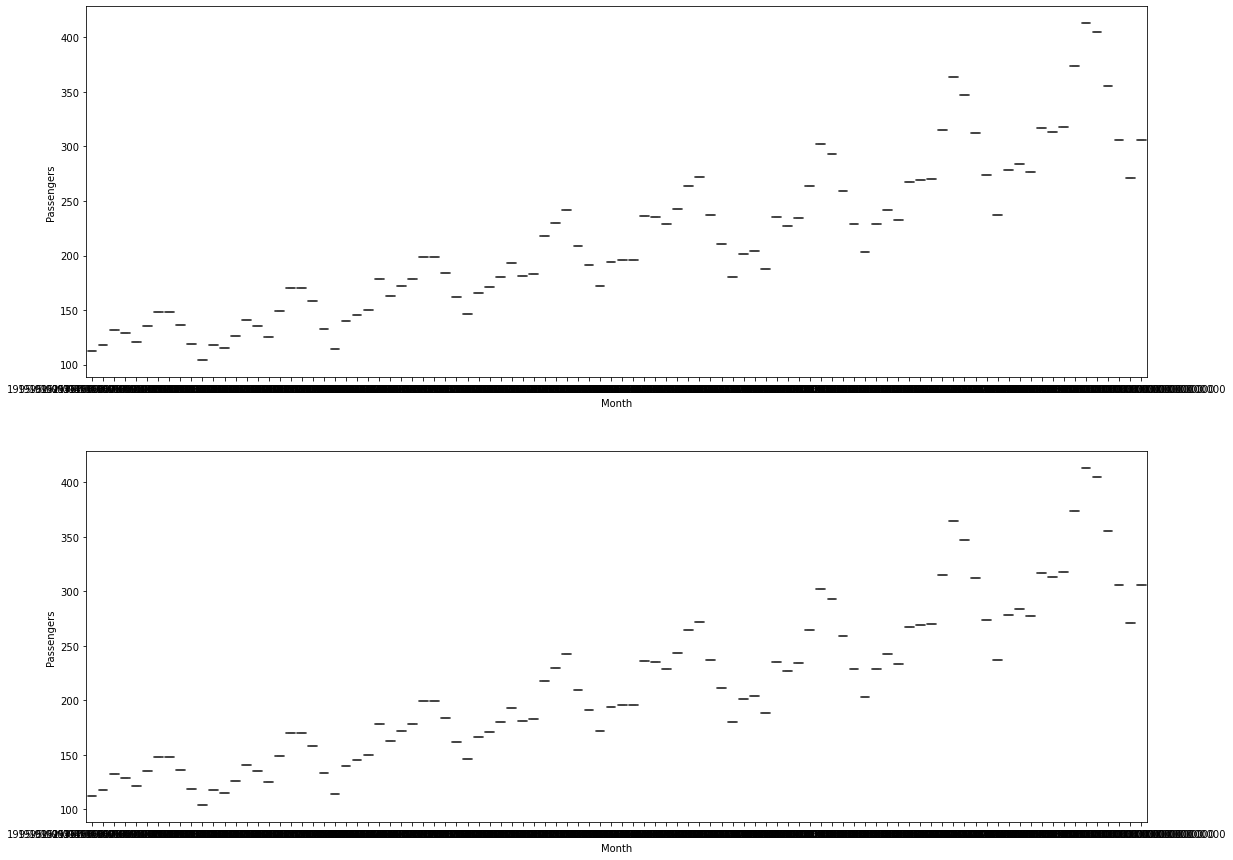

In [14]:
# Boxplot for ever

plt.figure(figsize=(19,15))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="Month",y="Passengers",data=df)

In [15]:
d = dict(zip(pd.date_range('2000-01-01', freq='M', periods=12).strftime('%b'),range(1,13)))

df["Month_No"] = df["Month_No"].map(d)

a=['Name']
df = pd.get_dummies(data=df, columns=['Month_No'], prefix=a)

month_name =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
column_name = ['Name_1', 'Name_2','Name_3', 'Name_4', 'Name_5', 'Name_6', 'Name_7', 'Name_8', 'Name_9',
               'Name_10', 'Name_11', 'Name_12']

rename_dic = {}
rename_dic = dict(zip(column_name,month_name))

df.rename(columns=rename_dic,
          inplace=True)

<AxesSubplot:>

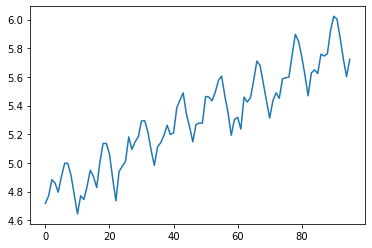

In [16]:
import numpy as np

df["t"] = np.arange(1,97)

df["t_squared"] = df["t"]*df["t"]

df["log_passengers"] = np.log(df["Passengers"])

df.log_passengers.plot()

In [17]:
df.head()

,Month,Passengers,Date,Month_new,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared,log_passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [18]:
#splitting Data

Train = df.head(72)
Test = df.tail(24)

In [19]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


51.6677929956463

In [20]:
# Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.55232894600458

In [21]:
# Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.990736401554834

In [22]:
# Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320346

In [23]:
# Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.24160848595718

In [24]:
# Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263474

In [25]:
# Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.714670246780654

In [26]:
# Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.714670
4,rmse_add_sea_quad,35.241608
1,rmse_Exp,42.552329
0,rmse_linear,51.667793
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,132.187628


In [52]:
# Multiplicative Additive Seasonality has lowest rsme

# predicting for entire data

# Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = df).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(df))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(df['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.662391150715681

In [53]:
import pandas as pd
df['Predicted_values'] = pd.Series(pred_Mult_add_sea)

In [44]:
df

,Month,Passengers,Date,Month_new,Year,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared,log_passengers,Predicted_val
0,1995-01-01,112,1995-01-01,Jan,1995,1,0,0,0,0,...,0,0,0,0,0,0,1,1,4.718499,<bound method Results.predict of <statsmodels....
1,1995-02-01,118,1995-02-01,Feb,1995,0,1,0,0,0,...,0,0,0,0,0,0,2,4,4.770685,NaN
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,1,0,0,...,0,0,0,0,0,0,3,9,4.882802,NaN
3,1995-04-01,129,1995-04-01,Apr,1995,0,0,0,1,0,...,0,0,0,0,0,0,4,16,4.859812,NaN
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,1,...,0,0,0,0,0,0,5,25,4.795791,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,0,0,0,0,...,0,1,0,0,0,0,92,8464,6.003887,NaN
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,...,0,0,1,0,0,0,93,8649,5.872118,NaN
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,...,0,0,0,1,0,0,94,8836,5.723585,NaN
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,...,0,0,0,0,1,0,95,9025,5.602119,NaN


In [54]:
df["Pred_passengers"] = np.exp(df["Predicted_values"])

In [55]:
df

,Month,Passengers,Date,Month_new,Year,Jan,Feb,Mar,Apr,May,...,Sep,Oct,Nov,Dec,t,t_squared,log_passengers,Predicted_val,Predicted_values,Pred_passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,0,0,0,0,...,0,0,0,0,1,1,4.718499,4.691732,4.691732,109.041881
1,1995-02-01,118,1995-02-01,Feb,1995,0,1,0,0,0,...,0,0,0,0,2,4,4.770685,4.716241,4.716241,111.747377
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,1,0,0,...,0,0,0,0,3,9,4.882802,4.861964,4.861964,129.277815
3,1995-04-01,129,1995-04-01,Apr,1995,0,0,0,1,0,...,0,0,0,0,4,16,4.859812,4.819033,4.819033,123.845300
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,1,...,0,0,0,0,5,25,4.795791,4.807076,4.807076,122.373301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,0,0,0,0,...,0,0,0,0,92,8464,6.003887,5.975173,5.975173,393.535995
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,...,1,0,0,0,93,8649,5.872118,5.867869,5.867869,353.494963
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,...,0,1,0,0,94,8836,5.723585,5.740788,5.740788,311.309720
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,...,0,0,1,0,95,9025,5.602119,5.611277,5.611277,273.493201


<AxesSubplot:>

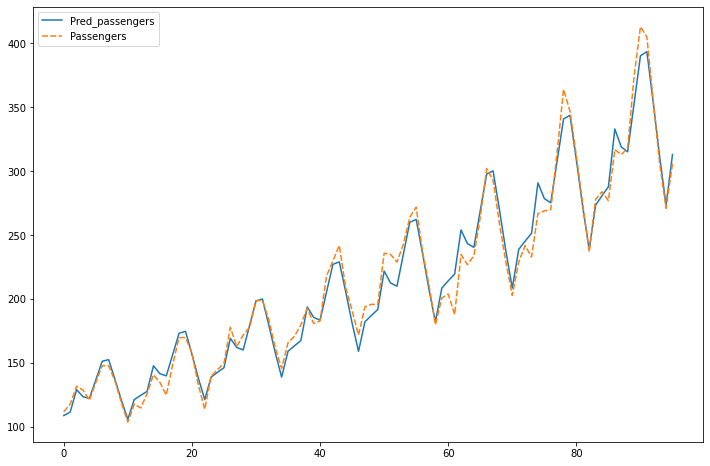

In [56]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Pred_passengers','Passengers']])

In [57]:
df[['Pred_passengers','Passengers']]

,Pred_passengers,Passengers
0,109.041881,112
1,111.747377,118
2,129.277815,132
3,123.845300,129
4,122.373301,121
...,...,...
91,393.535995,405
92,353.494963,355
93,311.309720,306
94,273.493201,271


## Multiplicative seasonality with linear trend has the best RMSE value.